<a href="https://colab.research.google.com/github/LIZZETHGOMEZ/Data-Sciene-BEDU-Santander-2021/blob/main/Machine%20Learning/Sesion_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sesión 3: Clasificación (k-mean)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
# Generamos blobs
x, y = make_blobs(n_samples = 1000, centers = 5, n_features = 2, random_state = 58)
k = 5

# Dividimos en testing y training
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4)

In [3]:
# Entrenamos modelo de clusterizacion con k = 5 clusters
modelo = KMeans(n_clusters = k).fit(x_train)

# Extracción de los centroides
centroids = modelo.cluster_centers_
print(centroids)

[[-2.65682488 -0.86636501]
 [-0.07039932 -8.667202  ]
 [ 6.31091113  9.46232293]
 [ 1.27348762 -4.35135827]
 [-4.06321715 -2.70673126]]


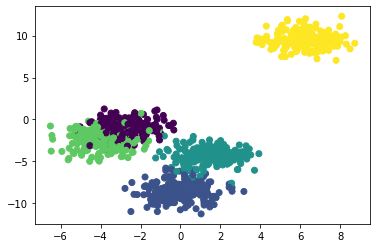

In [4]:
# Graficamos nuestra agrupacion
plt.scatter(x[:,0], x[:,1], c = y);
plt.show;

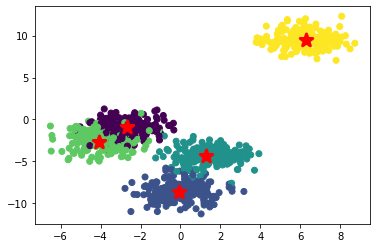

In [5]:
# Graficamos los centroides en la agrupacion
plt.scatter(x[:,0], x[:,1], c = y);
plt.scatter(centroids[:,0], centroids[:,1], marker = "*", s = 169, color = "red", zorder = 10, lw = 3)
plt.show;

In [6]:
import pandas as pd

### Selección de número de clusters utilizando Elbow Method (Método de codo)

In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2003.%20Clusterizaci%C3%B3n/Ejercicio%2001/datum-ej.csv")
data.head()

,Sexo,Edad,Total_Ventas,Salario
0,M,46,29800,4100
1,H,68,83000,8125
2,M,60,66400,5775
3,H,49,25900,3400
4,H,22,0,7075


In [8]:
# Queremos solo ventas y salario
X = data.iloc[:,2:].values
x1 = X[:,0]
y1 = X[:,1]

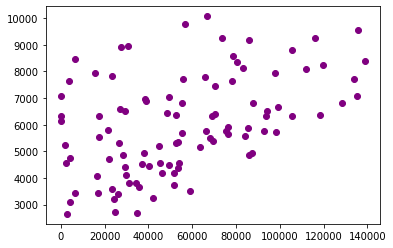

In [9]:
# Graficamos
plt.scatter(x1,y1, color = 'purple')
plt.show;

¿Cuántos clusters requerimos?

Nos apoyamos del método de códo

In [10]:
var = []
# Establecemos el rango de clusters
for i in range(1,10):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 15)
  kmeans.fit(X)
  var.append(kmeans.inertia_)

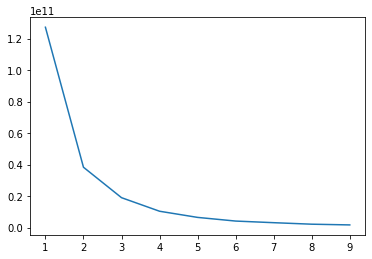

In [11]:
# El método nos dice que habra un punto que a partir de un número de clusters ya no será óptimo
# Aquí nos esta diciendo que a partir del cluster 3 ya no es optimo
# Por lo que usaremos 3 clusters

plt.plot(range(1,10), var);

In [12]:
# Generamos clusterizacion con k = 3
kmeans = KMeans(n_clusters = 3, init= "k-means++")
kmeans.fit(X)
print(kmeans.cluster_centers_)

clusters = kmeans.fit_predict(X)
data['label'] = clusters #agregamos los datos a nuestro df

data.head()

[[ 65460.97560976   6232.92682927]
 [ 21512.19512195   5185.36585366]
 [113258.82352941   7382.35294118]]


,Sexo,Edad,Total_Ventas,Salario,label
0,M,46,29800,4100,0
1,H,68,83000,8125,1
2,M,60,66400,5775,1
3,H,49,25900,3400,0
4,H,22,0,7075,0


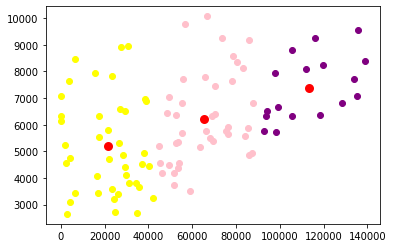

In [13]:
# Graficamos
plt.scatter(data.Total_Ventas[data.label == 0], data.Salario[data.label == 0], color = 'yellow')
plt.scatter(data.Total_Ventas[data.label == 1], data.Salario[data.label == 1], color = 'pink')
plt.scatter(data.Total_Ventas[data.label == 2], data.Salario[data.label == 2], color = 'purple')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "red", lw = 3)
plt.show()

In [14]:
data = pd.read_csv("https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2003.%20Clusterizaci%C3%B3n/Reto%2002/wine-challenge.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Color_Intensity
0,14.23,1.71,2.43,15.6,127,5.64
1,13.20,1.78,2.14,11.2,100,4.38
2,13.16,2.36,2.67,18.6,101,5.68
3,14.37,1.95,2.50,16.8,113,7.80
4,13.24,2.59,2.87,21.0,118,4.32


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          99 non-null     float64
 1   Malic_Acid       99 non-null     float64
 2   Ash              99 non-null     float64
 3   Ash_Alcanity     99 non-null     float64
 4   Magnesium        99 non-null     int64  
 5   Color_Intensity  99 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 4.8 KB


In [16]:
import seaborn as sns

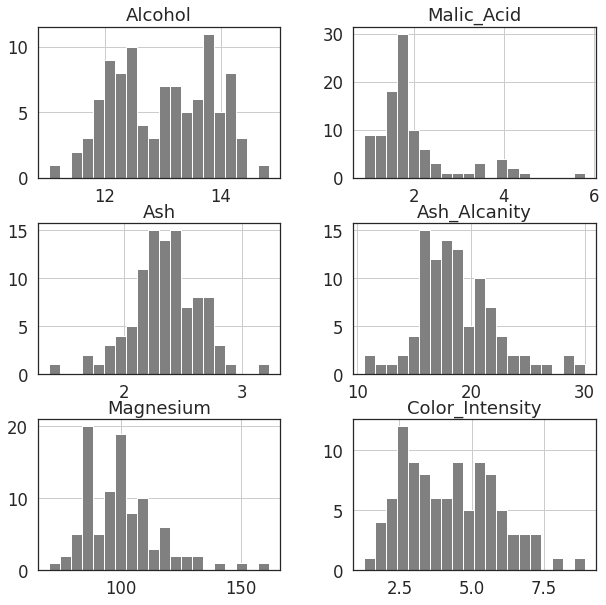

In [17]:
# Análisis de componentes principales
sns.set(style = "white", font_scale = 1.5, rc = {"figure.figsize":(10,10)})
ax = data.hist(bins = 20, color = 'grey')

In [18]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data_cluster = data.copy()
data_cluster[data_cluster.columns] = std_scaler.fit_transform(data_cluster)

In [19]:
data_cluster.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Color_Intensity
0,1.445459,-0.281329,0.321588,-0.915032,1.701773,0.872051
1,0.249375,-0.202076,-0.715805,-2.187257,-0.026509,0.079601
2,0.202925,0.454586,1.180120,-0.047606,0.037501,0.897208
3,1.608033,-0.009606,0.571993,-0.568062,0.805627,2.230536
4,0.295825,0.714987,1.895564,0.646335,1.125679,0.041865


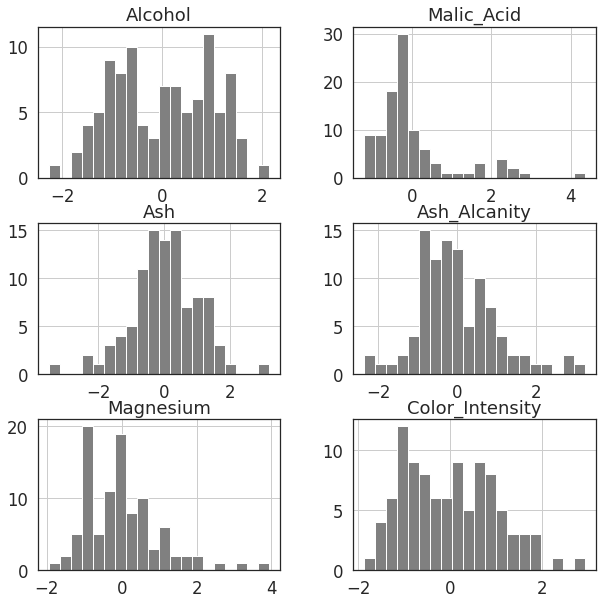

In [20]:
# Graficamos ya que reparametrizamos y observamos nuevamente
# Análisis de componentes principales
sns.set(style = "white", font_scale = 1.5, rc = {"figure.figsize":(10,10)})
ax = data_cluster.hist(bins = 20, color = 'grey')

Notemos que ahora nuestros histogramas estan algo centrados en cero en un rando de -4 a 4 una distribucion de tipo Z, digamos ya se mueven sobre el mismo rango

In [21]:
# ANÁLISIS DE COMPONENTES PRINCIPALES
from sklearn.decomposition import PCA

# Queremos reducir a dos dimensiones
pca_2 = PCA(2)
pca_2_resultados = pca_2.fit_transform(data_cluster)

In [22]:
print("Varianza acumulada explicada por las nuevas variables: {:.2%}".format(np.sum(pca_2.explained_variance_ratio_)))

Varianza acumulada explicada por las nuevas variables: 62.66%


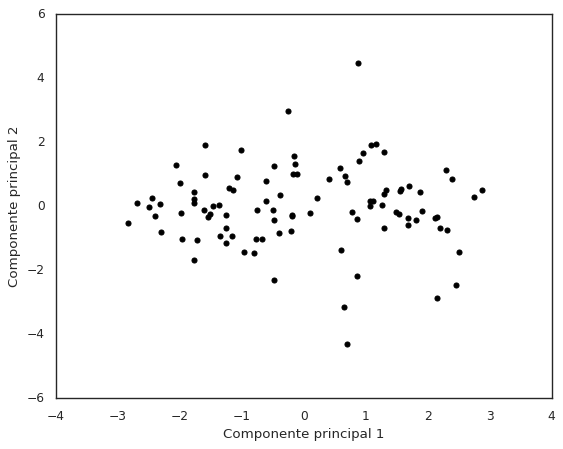

In [34]:
sns.set(style = "white")
plt.scatter(x = pca_2_resultados[:,0], y = pca_2_resultados[:,1], color = 'black')
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show();

In [96]:
# Clusterizacion
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster

inertia = []
for i in range(1,10):
  kmeans = cluster.KMeans(n_clusters = i, init = "k-means++", random_state = 18)
  kmeans.fit(data_cluster)
  inertia.append(kmeans.inertia_)

In [97]:
# Generación del método confirmatorio: método de la silueta
silueta = {}
for i in range(2,10):
  kmeans = cluster.KMeans(n_clusters = i, init = "k-means++", random_state = 18, n_init = 15, max_iter = 500)
  kmeans.fit(data_cluster)
  silueta[i] = silhouette_score(data_cluster, kmeans.labels_, metric = "euclidean")

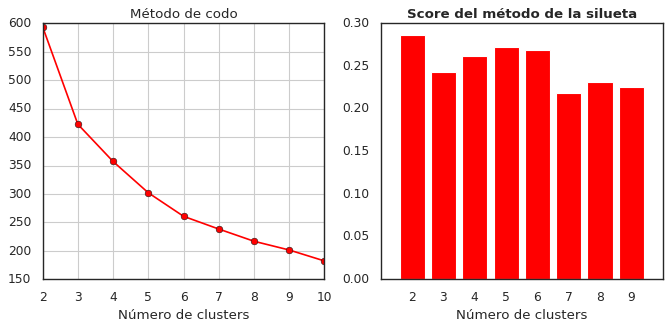

In [98]:
# Graficamos
sns.set(style = "white", rc = {"figure.figsize":(10,4)})

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia) + 2), inertia, marker = "o", color = "red")
plt.xlabel("Número de clusters")
plt.title("Método de codo")
plt.grid(True)

plt.subplot(1,2,2)

plt.bar(range(len(silueta)), list(silueta.values()), align = "center", color = "red")
plt.xticks(range(len(silueta)), list(silueta.keys()))
plt.title("Score del método de la silueta", fontweight = "bold")
plt.xlabel("Número de clusters")

plt.show()


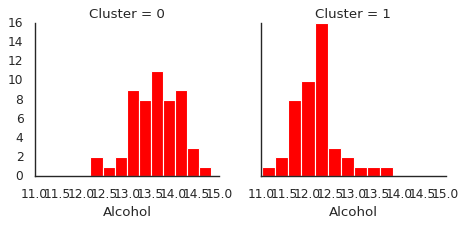

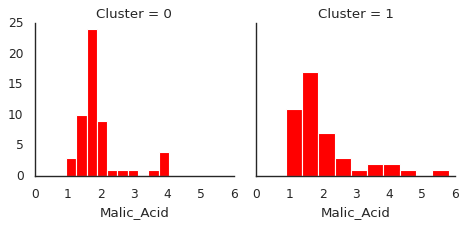

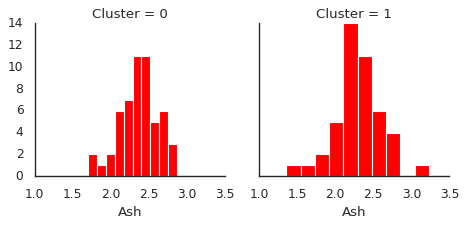

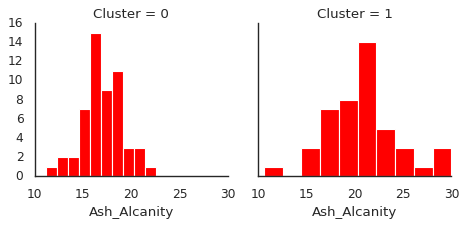

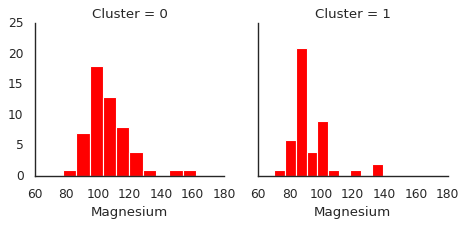

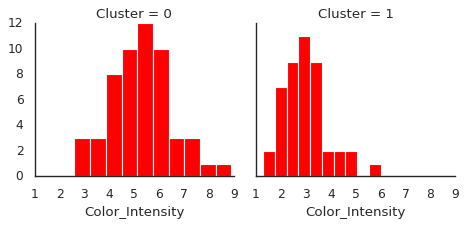

In [99]:
# Sabemos que son 2 clusters entonces
kmeans = cluster.KMeans(n_clusters = 2, random_state=84, init="k-means++")
kmeans_labels = kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
centroides_pca = pca_2.transform(centroids)

data2 = data.copy()
data2["Cluster"] = kmeans_labels

aux = data2.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
  grid = sns.FacetGrid(data2, col = "Cluster")
  grid.map(plt.hist, cluster, color = "red")

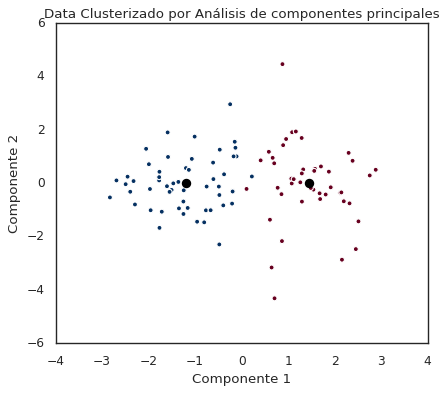

In [104]:
sns.set(style = "white", rc = {"figure.figsize": (6,5)})

plt.scatter(x = pca_2_resultados[:,0], y = pca_2_resultados[:,1], c = kmeans_labels, cmap = "RdBu_r")
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], marker = "o",  color = "black", linewidths = 4, zorder = 10);
plt.title("Data Clusterizado por Análisis de componentes principales")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2");